# RNN trading AI v1

In [1]:
#load data
import os
data_file = "../data/GC 06-18.txt"
with open(data_file, "r") as f:
    rawdata = f.read()
    f.close()
print("data loaded")

data loaded


In [2]:
#prepare data
import numpy as np
lines = rawdata.split('\n')
print(len(lines))
data = np.zeros((len(lines), 4))
for i, line in enumerate(lines):
    #origvalues = line.split('\t')
    #values = [float(v) for v in origvalues[2:]]
    values = [float(v) for v in line.split('\t')[2:]]
    try:
        data[i, :] = values
    except:
        data[i, :] = data[i - 1, :]

print("data prepared")

697698
data prepared


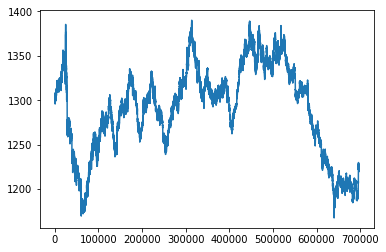

In [3]:
from matplotlib import pyplot as plt
val = data[:, 3]
%matplotlib inline
plt.plot(range(len(val)), val)

In [5]:
# normalize data
samples = 10000
mean = data[:samples].mean(axis=0)
data -= mean
std = data[:samples].mean(axis=0)
data /= std
print("done")
#print(data[829])

done


In [ ]:
# generator to generate data batches
def batch_generator(data, start_index, stop_index, avgsamples=[1], target_delay=3, 
                  target_samples=3, batch_size=128):
    def generateAvg(data, index, samples):
        avgsum = 0
        for i in range(samples):
            avgsum += data[index - i]
        return avgsum / samples
        
#     if start_index < avgsamples[len(avgsamples) - 1]:
#         start_index = avgsamples[len(avgsamples) - 1]
#     if stop_index > len(data) - batch_size - target_delay - target_samples:
#         stop_index = len(data) - batch_size - target_delay - target_samples
    while True:
        samples = np.zeros((batch_size, len(avgsamples)))
        for s in batch_size:
            for a in len(avgsamples):
                samples[s][a] = generateAvg(data, start_index + s, avgsamples[a])

6.5
